In [2]:
# importing libraries
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import tokenize
from sklearn import metrics
import itertools
from sklearn.tree import DecisionTreeClassifier

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mayankkumar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
fake = pd.read_csv("/Users/mayankkumar/Downloads/Fake.csv")
true = pd.read_csv("/Users/mayankkumar/Downloads/True.csv")

In [4]:
print(fake.shape)
print(true.shape)

(23481, 4)
(21417, 4)


In [5]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
# labellign
fake['target'] = 'fake'
true['target'] = 'true'

In [8]:
# concatenate dataframes
# .reset_index(drop = True) --> index continuation
data = pd.concat([fake, true]).reset_index(drop = True)

# removing title and date
data.drop(["date"],axis=1,inplace=True)
data.drop(["title"],axis=1,inplace=True)

In [9]:
data.head()

,text,subject,target
0,Donald Trump just couldn t wish all Americans ...,News,fake
1,House Intelligence Committee Chairman Devin Nu...,News,fake
2,"On Friday, it was revealed that former Milwauk...",News,fake
3,"On Christmas day, Donald Trump announced that ...",News,fake
4,Pope Francis used his annual Christmas Day mes...,News,fake


In [10]:
data.tail()

,text,subject,target
44893,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,true
44894,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,true
44895,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,true
44896,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,true
44897,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,true


In [11]:
# Shuffle the data
data = shuffle(data)
data = data.reset_index(drop=True)

In [12]:
data.head()

,text,subject,target
0,"RAFAH, Gaza Strip (Reuters) - Hamas called on ...",worldnews,true
1,Mentally ill teacher shoots Trump with a squir...,left-news,fake
2,Things got tense Sunday on 60 Minutes as CBS E...,politics,fake
3,This is what it looks like when the Wicked Wit...,News,fake
4,"LOL! If I was Cage s manager, I d suggest he s...",politics,fake



# NLP


In [13]:
# Convert to lowercase

data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,"rafah, gaza strip (reuters) - hamas called on ...",worldnews,true
1,mentally ill teacher shoots trump with a squir...,left-news,fake
2,things got tense sunday on 60 minutes as cbs e...,politics,fake
3,this is what it looks like when the wicked wit...,News,fake
4,"lol! if i was cage s manager, i d suggest he s...",politics,fake


In [14]:
# Remove punctuation, clean text can be utilized for NLP

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [15]:
data.head()

,text,subject,target
0,rafah gaza strip reuters hamas called on pale...,worldnews,true
1,mentally ill teacher shoots trump with a squir...,left-news,fake
2,things got tense sunday on 60 minutes as cbs e...,politics,fake
3,this is what it looks like when the wicked wit...,News,fake
4,lol if i was cage s manager i d suggest he shu...,politics,fake


In [16]:
# Removing stopwords using NLTK
# import nltk
# nltk.download('stopwords')
# from nltk.corpus import stopwords

stop = stopwords.words('english') # all stopwords of the language English

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [17]:
data.head()

,text,subject,target
0,rafah gaza strip reuters hamas called palestin...,worldnews,true
1,mentally ill teacher shoots trump squirt gun f...,left-news,fake
2,things got tense sunday 60 minutes cbs evening...,politics,fake
3,looks like wicked witch throws temper tantrumi...,News,fake
4,lol cage manager suggest shut mouth actthink m...,politics,fake


In [18]:
# how many news categories
data.groupby(['subject'])['text'].count()

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64

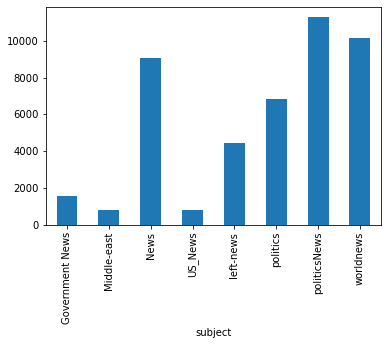

In [19]:
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

In [20]:
data.groupby(['target'])['text'].count()

target
fake    23481
true    21417
Name: text, dtype: int64

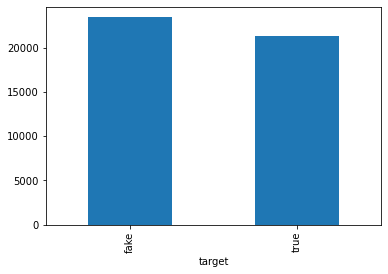

In [21]:
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

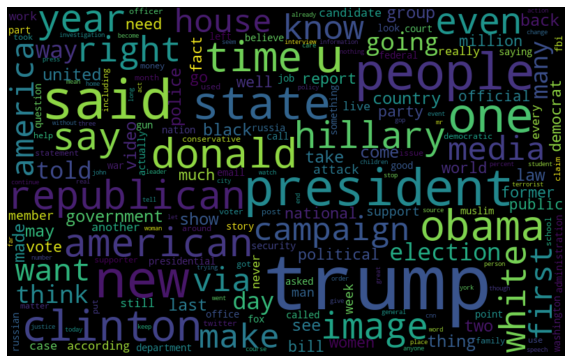

In [22]:
# most frequent words in fake news
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

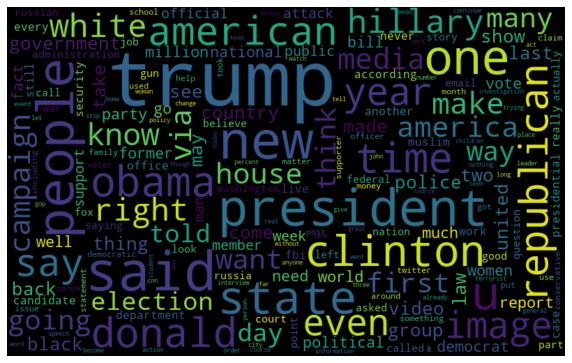

In [23]:
# most frequent words in true news
# from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [24]:
# Most frequent words counter
# from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

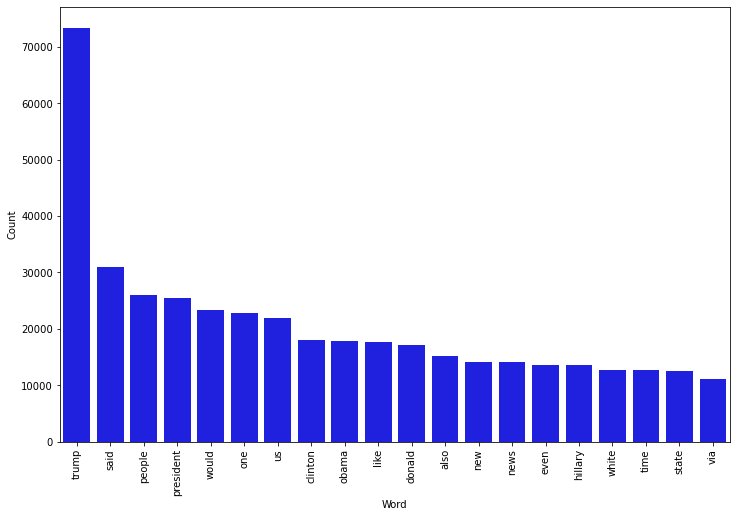

In [25]:
# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)

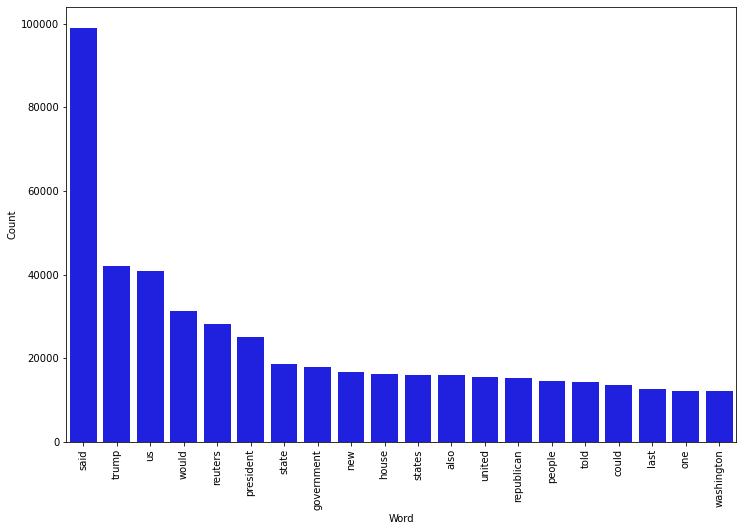

In [26]:
# Most frequent words in true news
counter(data[data["target"] == "true"], "text", 20)

In [27]:
X = data['text']
y = data.target

In [28]:
X.head()

0    rafah gaza strip reuters hamas called palestin...
1    mentally ill teacher shoots trump squirt gun f...
2    things got tense sunday 60 minutes cbs evening...
3    looks like wicked witch throws temper tantrumi...
4    lol cage manager suggest shut mouth actthink m...
Name: text, dtype: object

In [29]:
y.head()

0    true
1    fake
2    fake
3    fake
4    fake
Name: target, dtype: object


# Model Training


In [30]:
# split into training and test/validation data
split_size = 0.2 #20% data used in test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_size)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(35918,)
(8980,)
(35918,)
(8980,)


In [31]:
X_train.head()

11387    watch video compilation trump makes stance man...
41844    washingtonmoscow reuters us president donald t...
3246     harare reuters catholic priest mediating poten...
21750    bad darn russians presidentelect trump media i...
43680    baton rouge lawashington reuters us presidente...
Name: text, dtype: object

In [32]:
# target values/label
y_train.head()

11387    fake
41844    true
3246     true
21750    fake
43680    true
Name: target, dtype: object

In [33]:
# cectorizing and applying TFIDF
# from sklearn.tree import DecisionTreeClassifier

our_pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# fitting the model
model = our_pipe.fit(X_train, y_train)

# accuracy
prediction = model.predict(X_test)
print("Accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.58%


Confusion matrix, without normalization


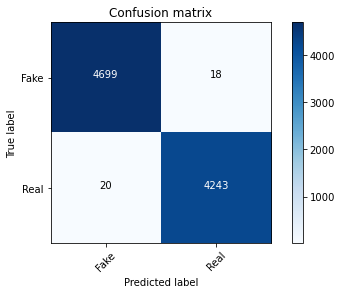

In [34]:
# Function to plot the confusion matrix - metric to measure accuracy
# from sklearn import metrics
# import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# 46xx fake news actually found fake